# WIDS 2021 - Identificação de pacientes com diabetes em UTIs

## Tratamento dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [ ]:
colunas = ['age', 'bmi', 'ethnicity', 'gender', 'height', 'weight', 'apache_3j_diagnosis', 'arf_apache',
           'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_creatinine_max', 
           'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min','d1_hemaglobin_max', 'd1_hemaglobin_min', 
           'diabetes_mellitus']

In [ ]:
colunas2 = ['age', 'bmi', 'ethnicity', 'gender', 'height', 'weight', 'hepatic_failure', 'apache_3j_diagnosis', 'arf_apache',
            'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min',
            'd1_creatinine_max','d1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min',
            'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_mbp_max', 'd1_mbp_min', 'diabetes_mellitus']

In [3]:
colunas3 = ['age', 'bmi', 'ethnicity', 'gender', 'height', 'weight', 'hepatic_failure', 'apache_3j_diagnosis', 
            'arf_apache', 'd1_creatinine_max', 'd1_albumin_max', 'd1_bilirubin_max', 'd1_glucose_max', 'd1_hemaglobin_max',
            'd1_sysbp_max', 'gcs_eyes_apache', 'cirrhosis', 'urineoutput_apache', 'diabetes_mellitus']

In [4]:
df_train = pd.read_csv('TrainingWiDS2021.csv', usecols=colunas3)

In [ ]:
# Removendo colunas que não serão usadas
#for i in df_train.columns.tolist():
   #  if i not in colunas: df_train.drop(i, axis=1, inplace=True)

In [5]:
df_train.shape

(130157, 19)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 19 columns):
age                    125169 non-null float64
bmi                    125667 non-null float64
ethnicity              128570 non-null object
gender                 130091 non-null object
height                 128080 non-null float64
weight                 126694 non-null float64
apache_3j_diagnosis    129292 non-null float64
arf_apache             130157 non-null int64
gcs_eyes_apache        127967 non-null float64
urineoutput_apache     66990 non-null float64
d1_sysbp_max           129886 non-null float64
d1_albumin_max         58751 non-null float64
d1_bilirubin_max       53422 non-null float64
d1_creatinine_max      116884 non-null float64
d1_glucose_max         121914 non-null float64
d1_hemaglobin_max      113925 non-null float64
cirrhosis              130157 non-null int64
hepatic_failure        130157 non-null int64
diabetes_mellitus      130157 non-null int64
dtypes: f

In [7]:
df_train.count()

age                    125169
bmi                    125667
ethnicity              128570
gender                 130091
height                 128080
weight                 126694
apache_3j_diagnosis    129292
arf_apache             130157
gcs_eyes_apache        127967
urineoutput_apache      66990
d1_sysbp_max           129886
d1_albumin_max          58751
d1_bilirubin_max        53422
d1_creatinine_max      116884
d1_glucose_max         121914
d1_hemaglobin_max      113925
cirrhosis              130157
hepatic_failure        130157
diabetes_mellitus      130157
dtype: int64

In [8]:
# Preenchendo peso e altura pelos valores medios
df_train['weight'].fillna(df_train['weight'].mean(), inplace=True)
df_train['height'].fillna(df_train['height'].mean(), inplace=True)

In [9]:
df_train.head()

,age,bmi,ethnicity,gender,height,weight,apache_3j_diagnosis,arf_apache,gcs_eyes_apache,urineoutput_apache,d1_sysbp_max,d1_albumin_max,d1_bilirubin_max,d1_creatinine_max,d1_glucose_max,d1_hemaglobin_max,cirrhosis,hepatic_failure,diabetes_mellitus
0,68.0,22.732803,Caucasian,M,180.3,73.900000,502.01,0,3.0,NaN,131.0,2.3,0.4,2.51,168.0,8.9,0,0,1
1,77.0,27.421875,Caucasian,F,160.0,70.200000,203.01,0,1.0,NaN,159.0,1.6,0.5,0.71,145.0,11.3,0,0,1
2,25.0,31.952749,Caucasian,F,172.7,95.300000,703.03,0,3.0,NaN,148.0,NaN,NaN,NaN,NaN,NaN,0,0,0
3,81.0,22.635548,Caucasian,F,165.1,61.700000,1206.03,0,4.0,NaN,158.0,NaN,NaN,NaN,185.0,11.6,0,0,0
4,19.0,NaN,Caucasian,M,188.0,83.791104,601.01,0,NaN,NaN,147.0,NaN,NaN,NaN,NaN,NaN,0,0,0


In [10]:
#Atualizando o valor do bmi, com cálculo de valores
df_train['bmi'] = df_train['weight'] / (df_train['height'] * df_train['height'])

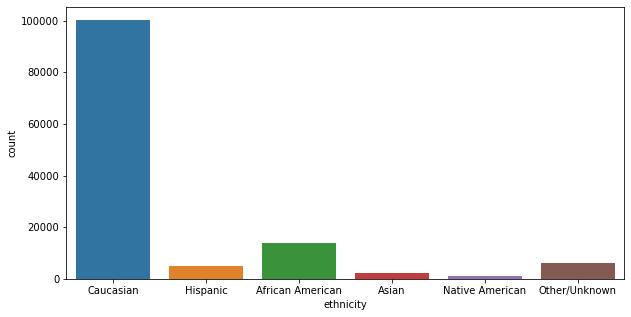

In [11]:
#Avaliando a distribuição de ethnicity, gender e age
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="ethnicity", data=df_train)

In [12]:
df_train['ethnicity'].fillna('Caucasian', inplace=True)
df_train['gender'].fillna('M', inplace=True)

In [13]:
### Tratando os dados, substituindo valores nulos pela média ou pelos valores de referencia
df_train['age'].fillna(df_train['age'].mean(), inplace=True)
df_train['d1_sysbp_max'].fillna(df_train['d1_sysbp_max'].mean(), inplace=True)
#df_train['d1_mbp_min'].fillna(df_train['d1_mbp_min'].mean(), inplace=True)
df_train['apache_3j_diagnosis'].fillna(df_train['apache_3j_diagnosis'].mean(), inplace=True)
df_train['urineoutput_apache'].fillna(df_train['urineoutput_apache'].mean(), inplace=True)
df_train['gcs_eyes_apache'].fillna(df_train['gcs_eyes_apache'].mean(), inplace=True)


#df_train['d1_hemaglobin_min'].fillna(df_train['d1_hemaglobin_min'].mean(), inplace=True)
df_train['d1_hemaglobin_max'].fillna(df_train['d1_hemaglobin_max'].mean(), inplace=True)

# Albumina: 35 – 54 g/L
#df_train['d1_albumin_min'].fillna(35, inplace=True)
df_train['d1_albumin_max'].fillna(54, inplace=True)
                                           
# Bilirrubina: 5.1 – 20.5 mcmol/L
#df_train['d1_bilirubin_min'].fillna(5.1, inplace=True)
df_train['d1_bilirubin_max'].fillna(20.5, inplace=True)


In [14]:
# Preenche campo de acordo com valores de referencia diferentes por sexo
# Formas de avaliar campos nulos pd.isnull(linha['d1_creatinine_max']) ou np.isnan(linha['d1_creatinine_min'])

# Creatinina μmol/L: M: 60-110 e F: 45-90
for indice, linha in df_train.iterrows():
    #if (linha['gender']=='M') and (pd.isnull(linha['d1_creatinine_min'])):
      #  df_train.at[indice , 'd1_creatinine_min'] = 60.0
    # elif (linha['gender']=='F') and (pd.isnull(linha['d1_creatinine_min'])): 
    #    df_train.at[indice , 'd1_creatinine_min'] = 45.0
    if (linha['gender']=='M') and (pd.isnull(linha['d1_creatinine_max'])): 
        df_train.at[indice , 'd1_creatinine_max'] = 100.0
    elif (linha['gender']=='F') and (pd.isnull(linha['d1_creatinine_max'])): 
        df_train.at[indice , 'd1_creatinine_max'] = 90.0

In [15]:
# Glicose g/L: Masculino 140–170 e Feminino 120–160
for indice, linha in df_train.iterrows():
   # if (linha['gender']=='M') and (pd.isnull(linha['d1_glucose_min'])): 
   #     df_train.at[indice ,'d1_glucose_min']=140
   # elif (linha['gender']=='F') and (pd.isnull(linha['d1_glucose_min'])): 
   #     df_train.at[indice ,'d1_glucose_min']=120
    if (linha['gender']=='M') and (pd.isnull(linha['d1_glucose_max'])): 
        df_train.at[indice ,'d1_glucose_max']=170
    elif (linha['gender']=='F') and (pd.isnull(linha['d1_glucose_max'])): 
        df_train.at[indice ,'d1_glucose_max']=160
    

In [16]:
df_train.count()

age                    130157
bmi                    130157
ethnicity              130157
gender                 130157
height                 130157
weight                 130157
apache_3j_diagnosis    130157
arf_apache             130157
gcs_eyes_apache        130157
urineoutput_apache     130157
d1_sysbp_max           130157
d1_albumin_max         130157
d1_bilirubin_max       130157
d1_creatinine_max      130157
d1_glucose_max         130157
d1_hemaglobin_max      130157
cirrhosis              130157
hepatic_failure        130157
diabetes_mellitus      130157
dtype: int64

In [17]:
#Importando bibliotecas de pre-processadores, modelo e analise
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score


In [18]:
enc = LabelEncoder()

In [19]:
sexo = enc.fit_transform(df_train['gender'])
raca = enc.fit_transform(df_train['ethnicity'])

In [20]:
df_train['gender'] = sexo
df_train['ethnicity'] = raca

In [21]:
df_train.head()

,age,bmi,ethnicity,gender,height,weight,apache_3j_diagnosis,arf_apache,gcs_eyes_apache,urineoutput_apache,d1_sysbp_max,d1_albumin_max,d1_bilirubin_max,d1_creatinine_max,d1_glucose_max,d1_hemaglobin_max,cirrhosis,hepatic_failure,diabetes_mellitus
0,68.0,0.002273,2,1,180.3,73.900000,502.01,0,3.00000,1800.803417,131.0,2.3,0.4,2.51,168.0,8.90000,0,0,1
1,77.0,0.002742,2,0,160.0,70.200000,203.01,0,1.00000,1800.803417,159.0,1.6,0.5,0.71,145.0,11.30000,0,0,1
2,25.0,0.003195,2,0,172.7,95.300000,703.03,0,3.00000,1800.803417,148.0,54.0,20.5,90.00,160.0,11.45981,0,0,0
3,81.0,0.002264,2,0,165.1,61.700000,1206.03,0,4.00000,1800.803417,158.0,54.0,20.5,90.00,185.0,11.60000,0,0,0
4,19.0,0.002371,2,1,188.0,83.791104,601.01,0,3.48829,1800.803417,147.0,54.0,20.5,100.00,170.0,11.45981,0,0,0


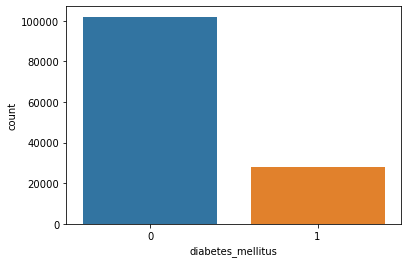

In [22]:
ax = sns.countplot(x="diabetes_mellitus", data=df_train)

In [23]:
#Separando classe e o target
X = df_train.drop('diabetes_mellitus', axis = 1)
y = df_train['diabetes_mellitus']

In [24]:
# sampling_strategy=0.7, define a quantidade de dados da classe minoritaria
smt = SMOTE()

In [25]:
X, y = smt.fit_sample(X, y)

In [26]:
np.bincount(y)

array([102006, 102006], dtype=int64)

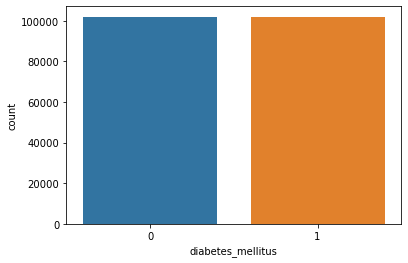

In [27]:
ax = sns.countplot(x=y)

## Treinamento do modelo

In [28]:
#Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [29]:
clf = LGBMClassifier()

In [30]:
# Valores testados: learning rate a 0,08 deu overfitting
# 'learning_rate':[0.01, 0.03, 0,05, 0.07, 0.08], 'n_estimators':[50, 100, 150] ,
# 'boosting_type':['gbdt', 'rf','dart'], 'max_depth':[20, 50, 100],'num_leaves':[50, 80, 100, 120, 130]

params = {'learning_rate':[0.01], 'n_estimators':[50] , 
          'boosting_type':['gbdt', 'rf','dart'], 'max_depth':[22], 'num_leaves':[220]}

In [31]:
grid = GridSearchCV(clf, param_grid=params, cv=10, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'rf', 'dart'],
                         'learning_rate': [0.01], 'max_depth': [22],
                         'n_estimators': [50], 'num_leaves': [220]},
             return_train_score=True)

In [32]:
grid.best_estimator_

LGBMClassifier(learning_rate=0.01, max_depth=22, n_estimators=50,
               num_leaves=220)

In [33]:
grid.best_score_

0.8060571430890289

In [34]:
pred = grid.predict(X_test)

In [35]:
print(confusion_matrix(y_test,pred))

print('\nMSE: ' + str(mean_squared_error(y_test,pred)))
print('Accuracy: ' + str(accuracy_score(y_test,pred)))
print('Recall: ' + str(recall_score(y_test,pred)))
print('F1-Score: ' + str(f1_score(y_test,pred)))

print('AUC: ' + str(roc_auc_score(y_test,pred)))
print('Cohen-Kappa: ' + str(cohen_kappa_score(y_test,pred)))

[[20540  4961]
 [ 4889 20613]]

MSE: 0.19312589455522225
Accuracy: 0.8068741054447778
Recall: 0.8082895459179672
F1-Score: 0.8071501292192028
AUC: 0.8068740776921313
Cohen-Kappa: 0.613748189359404


## Predição

In [36]:
df_pred = pd.read_csv('UnlabeledWiDS2021.csv')

In [37]:
colunas_pred = X.columns.tolist()

In [38]:
df_pred.count()

Unnamed: 0                     10234
encounter_id                   10234
hospital_id                    10234
age                            10234
bmi                             9219
                               ...  
hepatic_failure                10234
immunosuppression              10234
leukemia                       10234
lymphoma                       10234
solid_tumor_with_metastasis    10234
Length: 180, dtype: int64

In [40]:
# Preenchendo peso e altura pelos valores medios
df_pred['weight'].fillna(df_pred['weight'].mean(), inplace=True)
df_pred['height'].fillna(df_pred['height'].mean(), inplace=True)

In [41]:
#Atualizando o valor do bmi, com cálculo de valores
df_pred['bmi'] = df_pred['weight'] / (df_pred['height'] * df_pred['height'])

In [42]:
#Preencheendo campos com os valores de maior incidência
df_pred['ethnicity'].fillna('Caucasian', inplace=True)
df_pred['gender'].fillna('M', inplace=True)

In [43]:
### Tratando os dados, substituindo valores nulos pela média ou pelos valores de referencia
df_pred['age'].fillna(df_pred['age'].mean(), inplace=True)
df_pred['d1_mbp_max'].fillna(df_pred['d1_mbp_max'].mean(), inplace=True)
#df_pred['d1_mbp_min'].fillna(df_pred['d1_mbp_min'].mean(), inplace=True)
df_pred['apache_3j_diagnosis'].fillna(df_pred['apache_3j_diagnosis'].mean(), inplace=True)
df_pred['urineoutput_apache'].fillna(df_train['urineoutput_apache'].mean(), inplace=True)
df_pred['gcs_eyes_apache'].fillna(df_train['gcs_eyes_apache'].mean(), inplace=True)

#df_pred['d1_hemaglobin_min'].fillna(df_pred['d1_hemaglobin_min'].mean(), inplace=True)
df_pred['d1_hemaglobin_max'].fillna(df_pred['d1_hemaglobin_max'].mean(), inplace=True)

# Albumina: 35 – 54 g/L
#df_pred['d1_albumin_min'].fillna(35, inplace=True)
df_pred['d1_albumin_max'].fillna(54, inplace=True)
                                           
# Bilirrubina: 5.1 – 20.5 mcmol/L
#df_pred['d1_bilirubin_min'].fillna(5.1, inplace=True)
df_pred['d1_bilirubin_max'].fillna(20.5, inplace=True)


In [44]:
# Preenche campo de acordo com valores de referencia diferentes por sexo
# Formas de avaliar campos nulos pd.isnull(linha['d1_creatinine_max']) ou np.isnan(linha['d1_creatinine_min'])

# Creatinina μmol/L: M: 60-110 e F: 45-90
for indice, linha in df_pred.iterrows():
   # if (linha['gender']=='M') and (pd.isnull(linha['d1_creatinine_min'])):
   #     df_pred.at[indice , 'd1_creatinine_min'] = 60.0
   # elif (linha['gender']=='F') and (pd.isnull(linha['d1_creatinine_min'])): 
   #     df_pred.at[indice , 'd1_creatinine_min'] = 45.0
    if (linha['gender']=='M') and (pd.isnull(linha['d1_creatinine_max'])): 
        df_pred.at[indice , 'd1_creatinine_max'] = 100.0
    elif (linha['gender']=='F') and (pd.isnull(linha['d1_creatinine_max'])): 
        df_pred.at[indice , 'd1_creatinine_max'] = 90.0

In [45]:
# Glicose g/L: Masculino 140–170 e Feminino 120–160
for indice, linha in df_pred.iterrows():
   # if (linha['gender']=='M') and (pd.isnull(linha['d1_glucose_min'])): 
   #     df_pred.at[indice ,'d1_glucose_min']=140
   # elif (linha['gender']=='F') and (pd.isnull(linha['d1_glucose_min'])): 
   #     df_pred.at[indice ,'d1_glucose_min']=120
    if (linha['gender']=='M') and (pd.isnull(linha['d1_glucose_max'])): 
        df_pred.at[indice ,'d1_glucose_max']=170
    elif (linha['gender']=='F') and (pd.isnull(linha['d1_glucose_max'])): 
        df_pred.at[indice ,'d1_glucose_max']=160
    

In [46]:
df_pred.count()

Unnamed: 0                     10234
encounter_id                   10234
hospital_id                    10234
age                            10234
bmi                            10234
                               ...  
hepatic_failure                10234
immunosuppression              10234
leukemia                       10234
lymphoma                       10234
solid_tumor_with_metastasis    10234
Length: 180, dtype: int64

In [47]:
enc_pred = LabelEncoder()

sexo = enc_pred.fit_transform(df_pred['gender'])
raca = enc_pred.fit_transform(df_pred['ethnicity'])

df_pred['gender'] = sexo
df_pred['ethnicity'] = raca

In [48]:
df_pred.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,0.003594,0,2,0,152.4,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,0.002717,0,2,0,175.3,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,0.003157,0,2,0,162.6,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,0.002641,0,2,1,177.8,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,0.002882,0,2,1,170.2,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [49]:
X_pred = df_pred[colunas_pred]

In [50]:
X_pred.shape

(10234, 18)

In [51]:
predito = grid.predict(X_pred)

In [52]:
df_pred['diabetes_mellitus'] = predito

df_pred.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,144740,10141,72,0.003594,0,2,0,152.4,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,141990,10141,86,0.002717,0,2,0,175.3,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
2,3,142038,10141,72,0.003157,0,2,0,162.6,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,138628,10141,66,0.002641,0,2,1,177.8,Floor,...,NaN,NaN,0,0,0,0,0,0,0,0
4,5,141682,10141,89,0.002882,0,2,1,170.2,Direct Admit,...,NaN,NaN,0,0,0,0,0,0,0,0


In [53]:
df_submission = df_pred[['encounter_id','diabetes_mellitus']]

df_submission.head()

,encounter_id,diabetes_mellitus
0,144740,0
1,141990,0
2,142038,0
3,138628,0
4,141682,0


In [54]:
print((df_submission['diabetes_mellitus']==0).sum())
print((df_submission['diabetes_mellitus']==1).sum())

7190
3044


In [ ]:
df_submission.to_csv('wids2021_submission.csv',header=True,index=False)